""" Analysis of pepper reindeers periods data """ 
---
---

reinders period 1: 23.10.2019 10:00 - 31.10.2019 16:00 1/2 43 - 1/2 44<br>
reindeers period 2: 11.12.2019 16:00 - 17.12.2019 16:00 1/2 50 - 1/2 51<br>
black friday: 29.11.2020

The goal is to see the growth of offers and users' acitvity around the events mentioned.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
%matplotlib inline

In [5]:
products = pd.read_csv('data/product_data.csv')
df = products

In [6]:
df.head()

,product_name,product_date,product_group,product_comments,product_votes,product_merchant
0,Ananas cena za szt. @Auchan,Obowiązuje do 18/12/2019,"['Jedzenie', 'Artykuły spożywcze', 'Hity z mar...",3,139,Auchan
1,"Jack&Jones -50% na wszystko, Galeria Bałtycka,...",54 min,['Moda'],6,132,None
2,"Jack Daniels 1,5 l Biedronka","1 g, 1 min",['Artykuły spożywcze'],14,279,Biedronka
3,BONSAI DUŻY ok 70cm Biedronka,"1 g, 3 min",['Dom i mieszkanie'],17,383,Biedronka
4,Potęga podświadomości BIEDRONKA (stalowa wola),"1 g, 3 min","['Kultura i rozrywka', 'Hity z marketów']",12,126,Biedronka


#### Standarize product_date column

In [7]:
# restructure dates text to numbers
# remove hours from dates
# remove all text from dates
import re
df.loc[df['product_date'].str.contains('min'), 'product_date'] =  '19/12/12'
df = df.replace({'product_date': {
    'sty ': '19/01/',
    'lut ': '19/02/',
    'mar ': '19/03/',
    'kwi ': '19/04/',
    'maj ': '19/05/',
    'cze ': '19/06/',
    'lip ': '19/07/',
    'sie ': '19/08/',
    'wrz ': '19/09/',
    'paź ': '19/10/',
    'lis ': '19/11/',
    'gru ': '19/12/',
    '\.': '',
    '[0-9][0-9]?:[0-9][0-9]': '',
    'Obowiązuje do ': '',
    '.*Opublikowano ': '',
    '\)': '',
    'Rozpoczyna się ': '',
    ' ': '',
    }}, regex=True
     )

In [8]:
# remove entries from other years and those without date
df.drop(df[df.product_date.str.contains('2018')].index, inplace=True)
df.drop(df[df.product_date.str.contains('2020')].index, inplace=True)
df.drop(df[df.product_date.str.lower().str.contains('dzisiaj')].index, inplace=True)
df.drop(df[df.product_date.str.lower().str.contains('jutro')].index, inplace=True)

In [9]:
# unify dates
# df.product_date = np.where(df.product_date.str.len()<10, pd.to_datetime(df.product_date, format='%y/%m/%d'), pd.to_datetime(df.product_date, format='%d/%m/%Y'))
import datetime
def unify_dates(row):
    if len(row) == 7:
        row = row[:6]+'0'+row[-1]
        row = datetime.datetime.strptime(row, '%y/%m/%d')
    elif len(row) == 8:
        row = datetime.datetime.strptime(row, '%y/%m/%d')
    else:
        row = datetime.datetime.strptime(row, '%d/%m/%Y')
    return row
    
df.product_date = df.product_date.apply(unify_dates)

Growth of offers added
---

Text(0.5, 1.0, 'Number of offers per month')

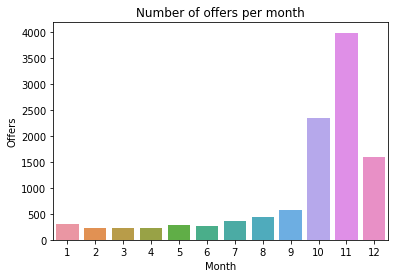

In [518]:
# monthly view
months = df.groupby(df['product_date'].dt.month)
ax = sns.barplot(y=months['product_date'].count().values, x=months['product_date'].count().index.tolist(), data=df)
ax.set_xlabel("Month")
ax.set_ylabel("Offers")
ax.set_title('Number of offers per month')


Text(0.5, 1.0, 'Number of offers per calendar week')

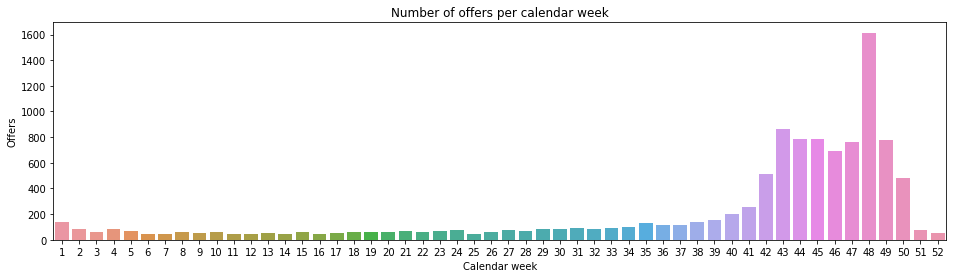

In [527]:
# weekly view
weeks = df.groupby(df['product_date'].dt.week)
plt.figure(figsize=(16, 4))
ax = sns.barplot(y=weeks['product_date'].count().values, x=weeks['product_date'].count().index.tolist(), data=df)
ax.set_xlabel("Calendar week")
ax.set_ylabel("Offers")
ax.set_title('Number of offers per calendar week')

Growth of votes and comments
---

Text(0.5, 1.0, 'Comments and votes per calendar week')

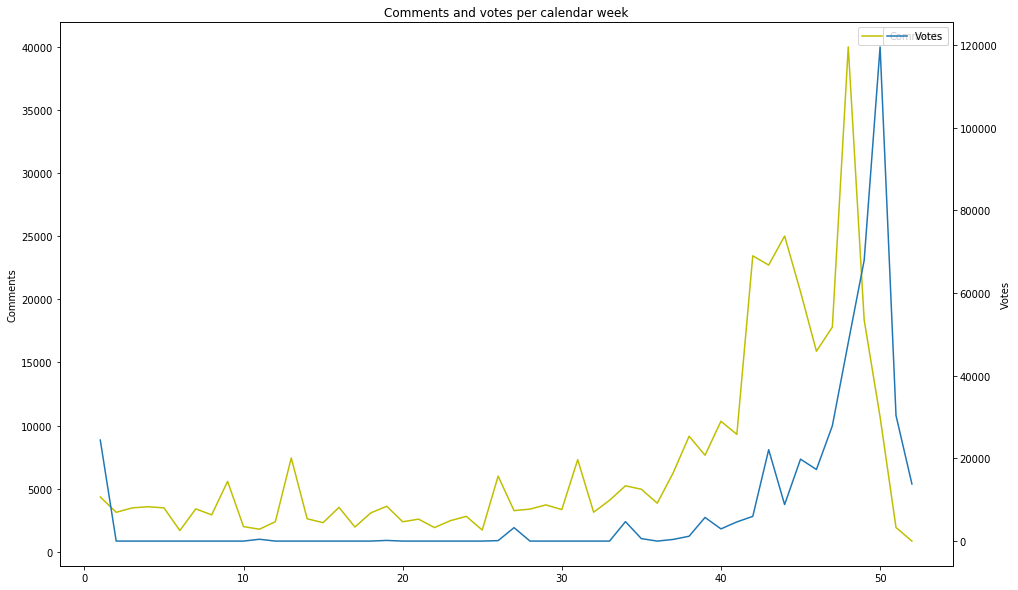

In [526]:
fig, ax1 = plt.subplots(figsize=(16, 10))
comms = sns.lineplot(y=weeks['product_comments'].sum().values, x=weeks['product_comments'].sum().index.tolist(), data=df, ax=ax1, color='y', label='Comments')
ax2 = ax1.twinx()
vots = sns.lineplot(y=weeks['product_votes'].sum().values, x=weeks['product_votes'].sum().index.tolist(), data=df, ax=ax2, label='Votes')
ax1.set_ylabel("Comments")
ax2.set_ylabel("Votes")


ax2.set_title('Comments and votes per calendar week')

# Growth in product categories

In [411]:
df['product_group'] = df['product_group'].apply(lambda x: x.replace("['", '')).apply(lambda x: x.replace("']",'')).apply(lambda x: x.replace("'", ''))
product_groups = df['product_group'].value_counts().rename_axis('Product category').reset_index(name='offers')

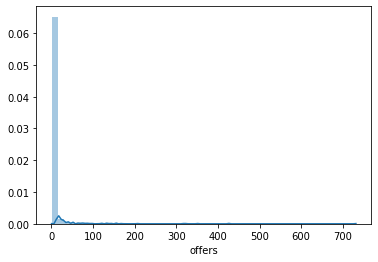

In [412]:
sns.distplot(product_groups.offers)

In [528]:
# remove the product groups that have little offers added
product_groups[product_groups.offers>50].sum()
product_groups.offers.head(50)
product_groups=product_groups[product_groups.offers>50]

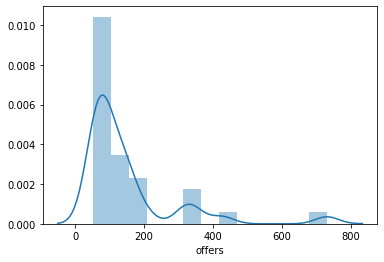

In [529]:
sns.distplot(product_groups.offers)

Text(0.5, 1.0, 'Offers in categories')

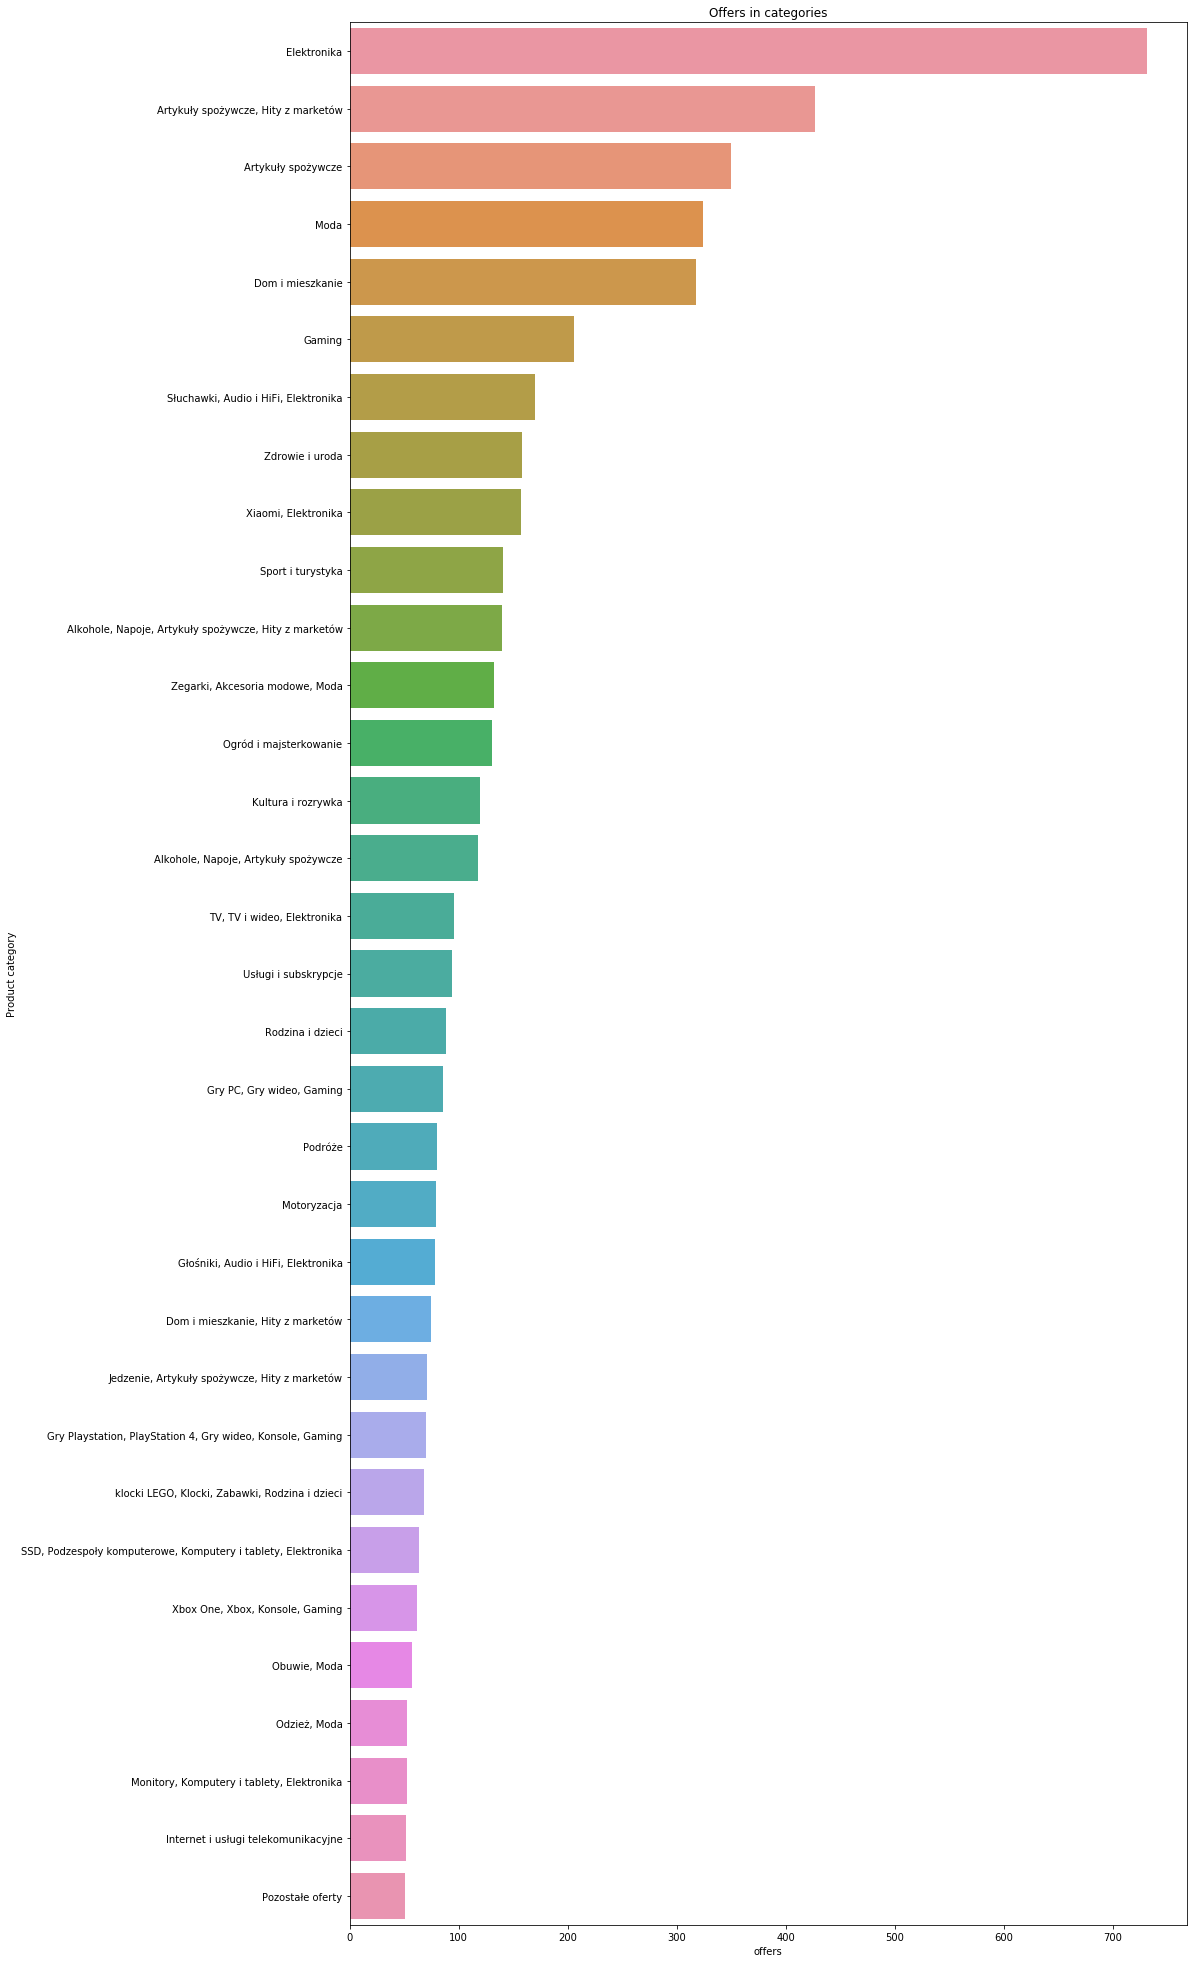

In [561]:
plt.figure(figsize=(15,35))
ax = sns.barplot(x=product_groups['offers'], y=product_groups['Product category'])
ax.set_title('Offers in categories')

There are more than 2k different categories (or their mixes) used in posted offers, <br>
so the data will be limited to more than 50 usages of given category (categries mix).<br>
That results in 30 categories and contains almost 50% of all offers.

Text(0.5, 1.0, 'Categories growth in calendat week view')

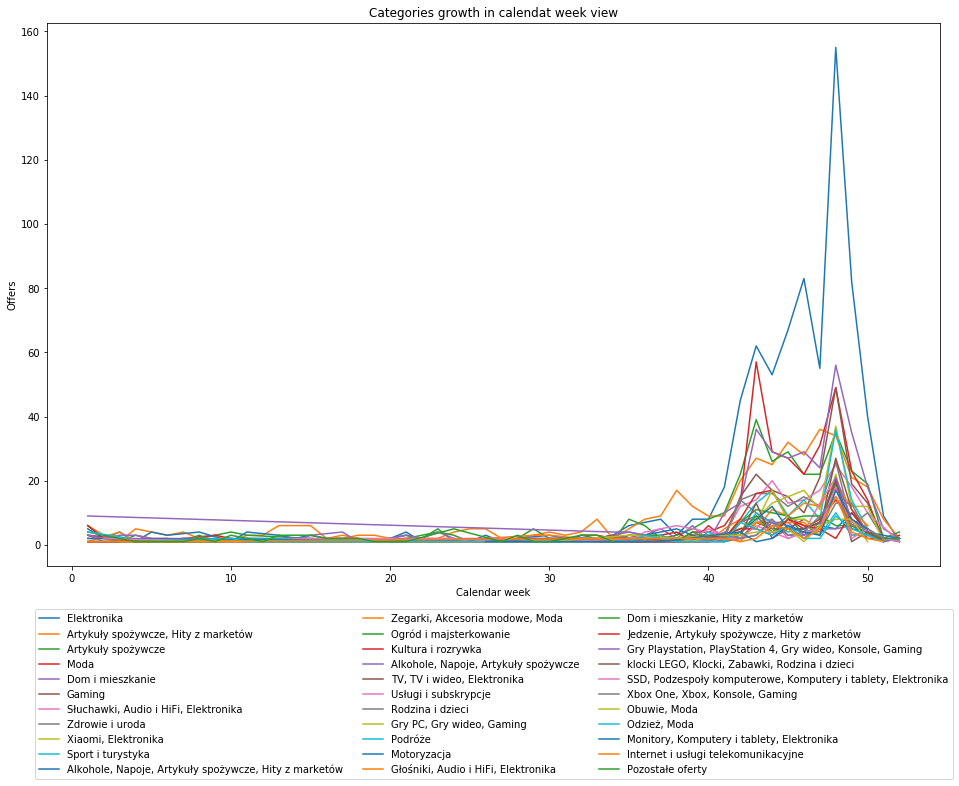

In [559]:
fig, ax1 = plt.subplots(figsize=(16, 10))
for category in product_groups['Product category']:
    weeks = df_maincategories[df_maincategories['product_group']==category].groupby([df_maincategories['product_date'].dt.week])
    category_line = sns.lineplot(y=weeks['product_group'].count(), x=weeks['product_group'].count().index.tolist(), data=df_maincategories, label=category)
ax1.set_ylabel('Offers')
ax1.set_xlabel('Calendar week')
ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=3)
ax1.set_title('Categories growth in calendat week view')